### Exploratory Data Analysis (EDA)

In [14]:
# importing the necessary libraries and loading the dataset
import pandas as pd
df=pd.read_excel(r"C:\Users\khanu\Documents\classexcelr\assignment downloads\Random Forest\glass.xlsx",sheet_name='glass')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [16]:
# reading the number of rows and columns
df.shape

(214, 10)

In [18]:
# extracting the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [20]:
# summary statistics
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [22]:
# checking for null values if any present in the dataset
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<Figure size 1200x900 with 0 Axes>

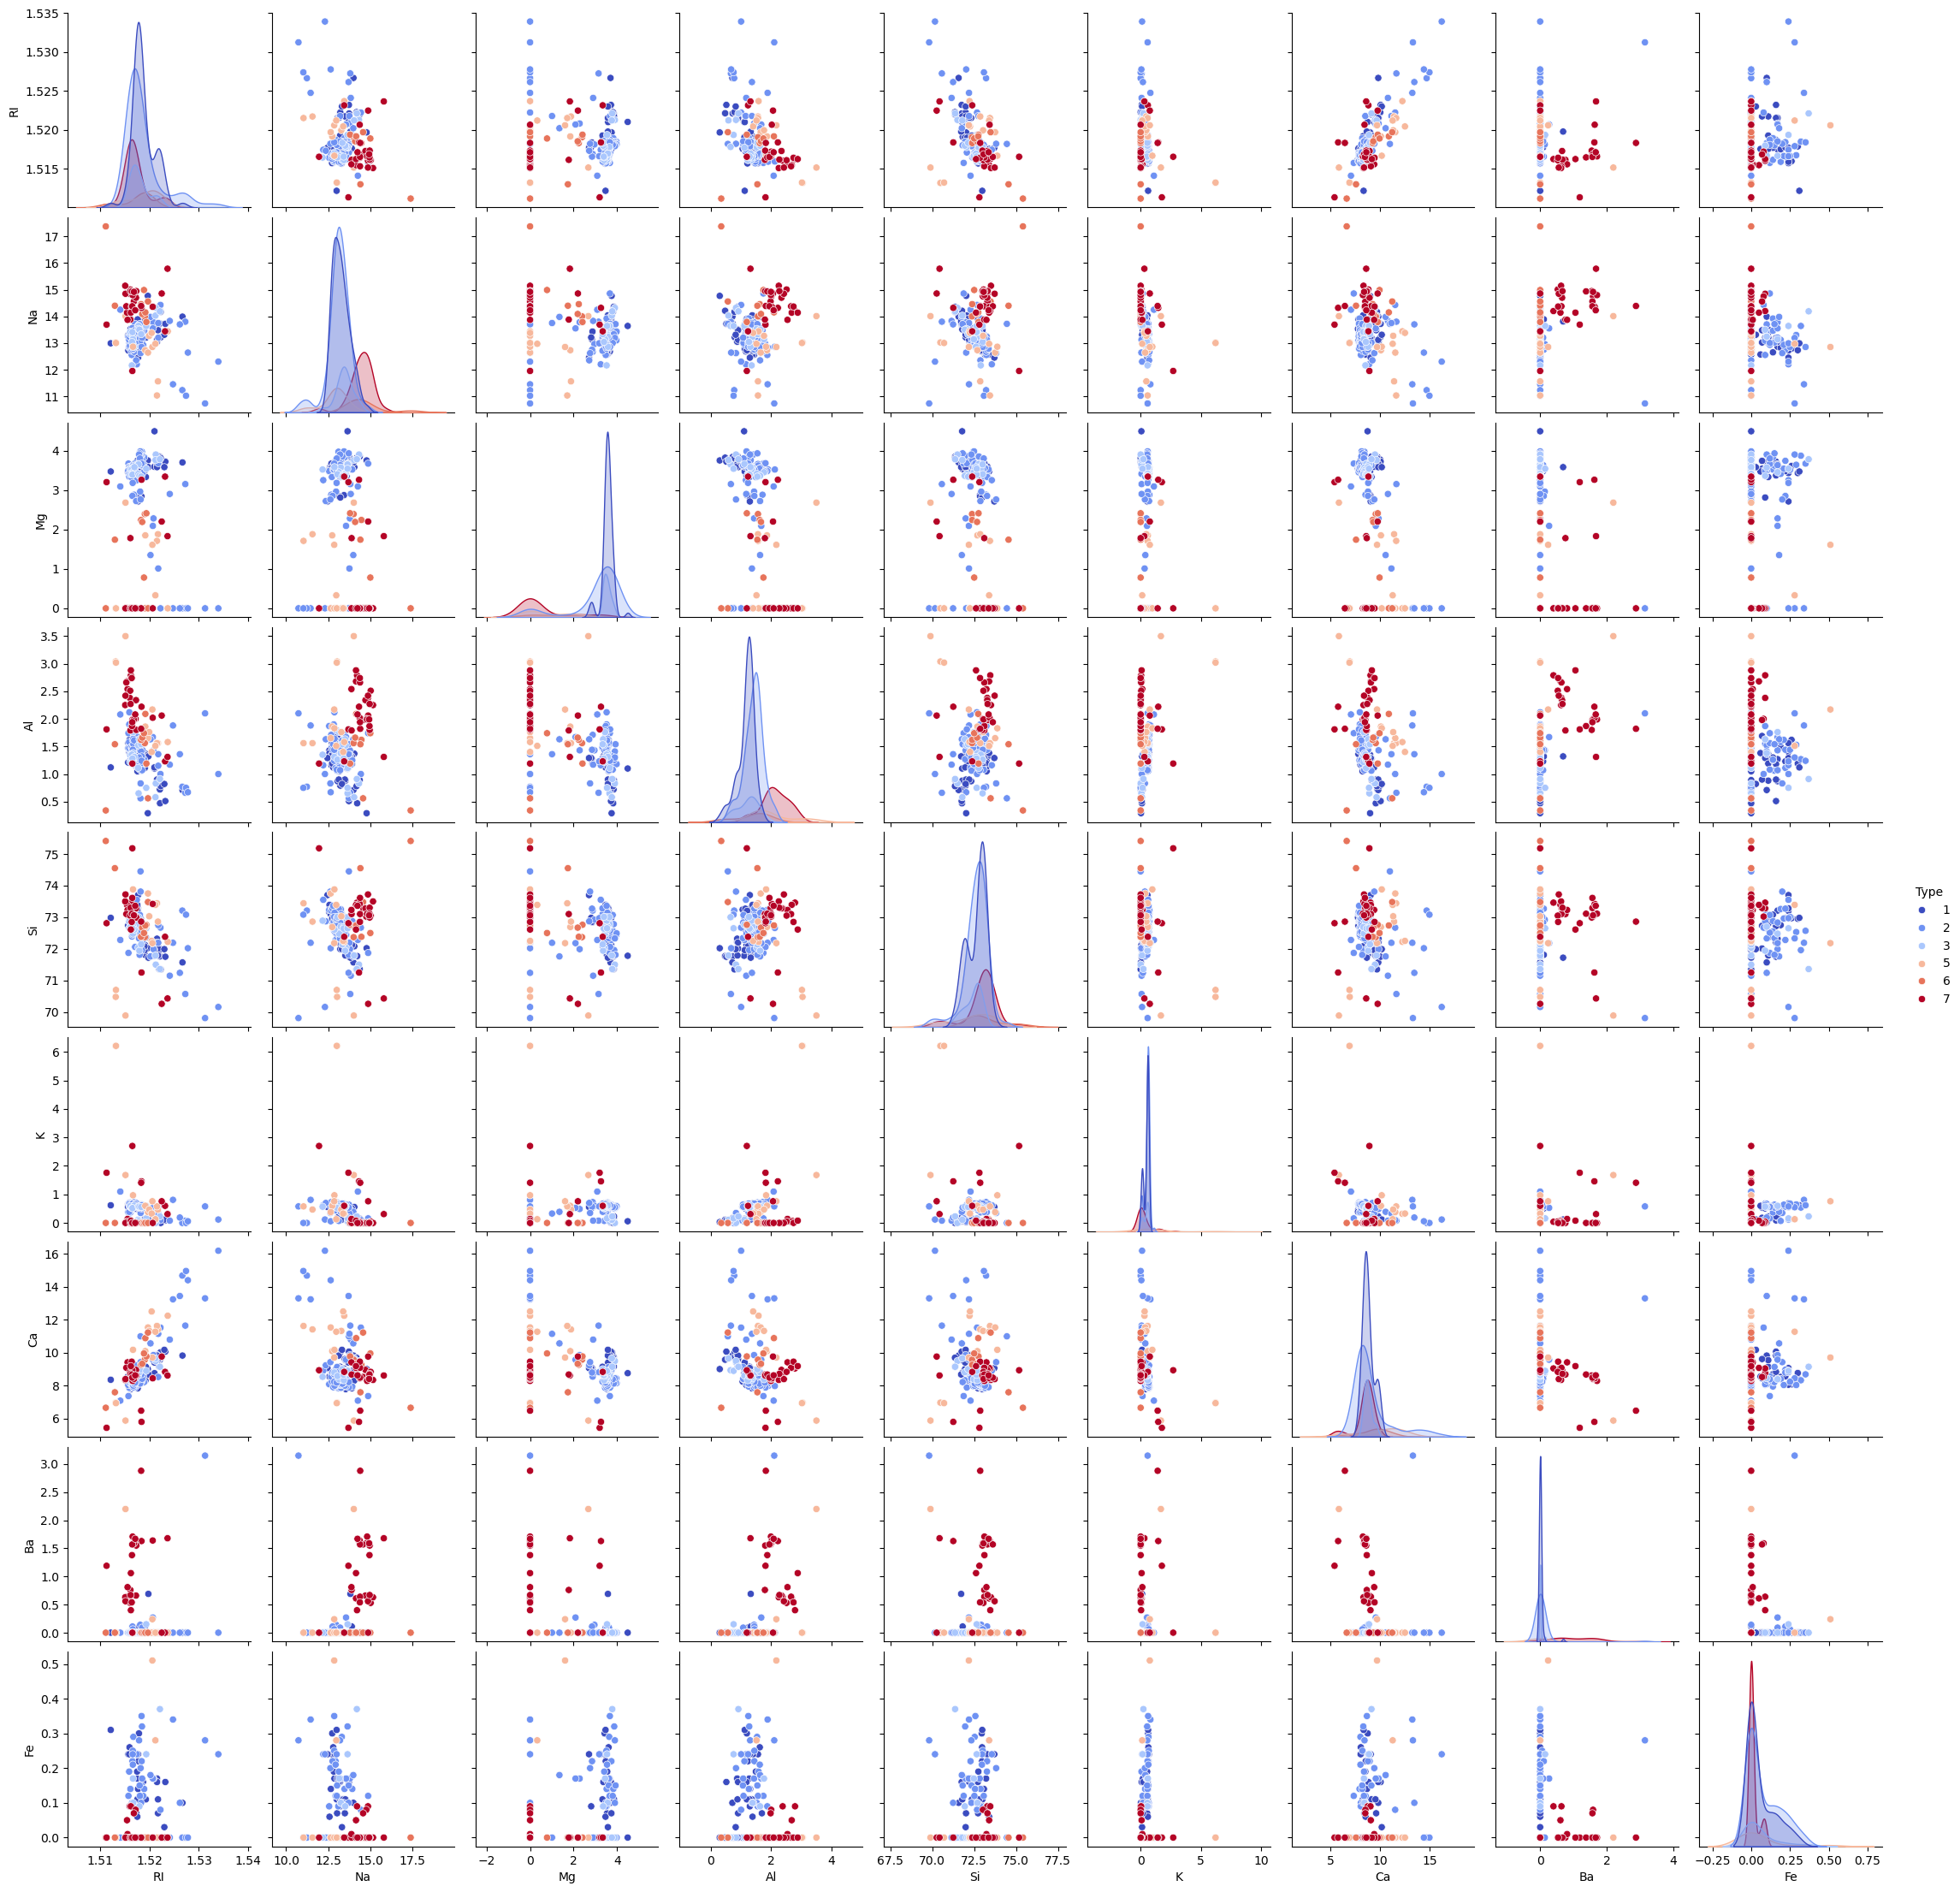

In [25]:
# plotting pairplot to check the relationship between the variables

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
sns.pairplot(df,palette='coolwarm',hue='Type')
plt.show()

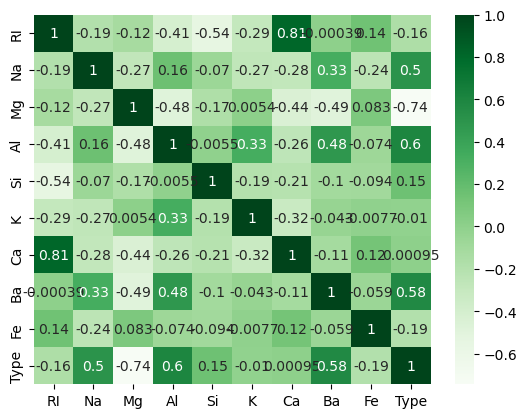

In [35]:
# plotting heatmap to chcek for correlation between the variables

sns.heatmap(df.corr(),cmap='Greens',annot=True)
plt.show()

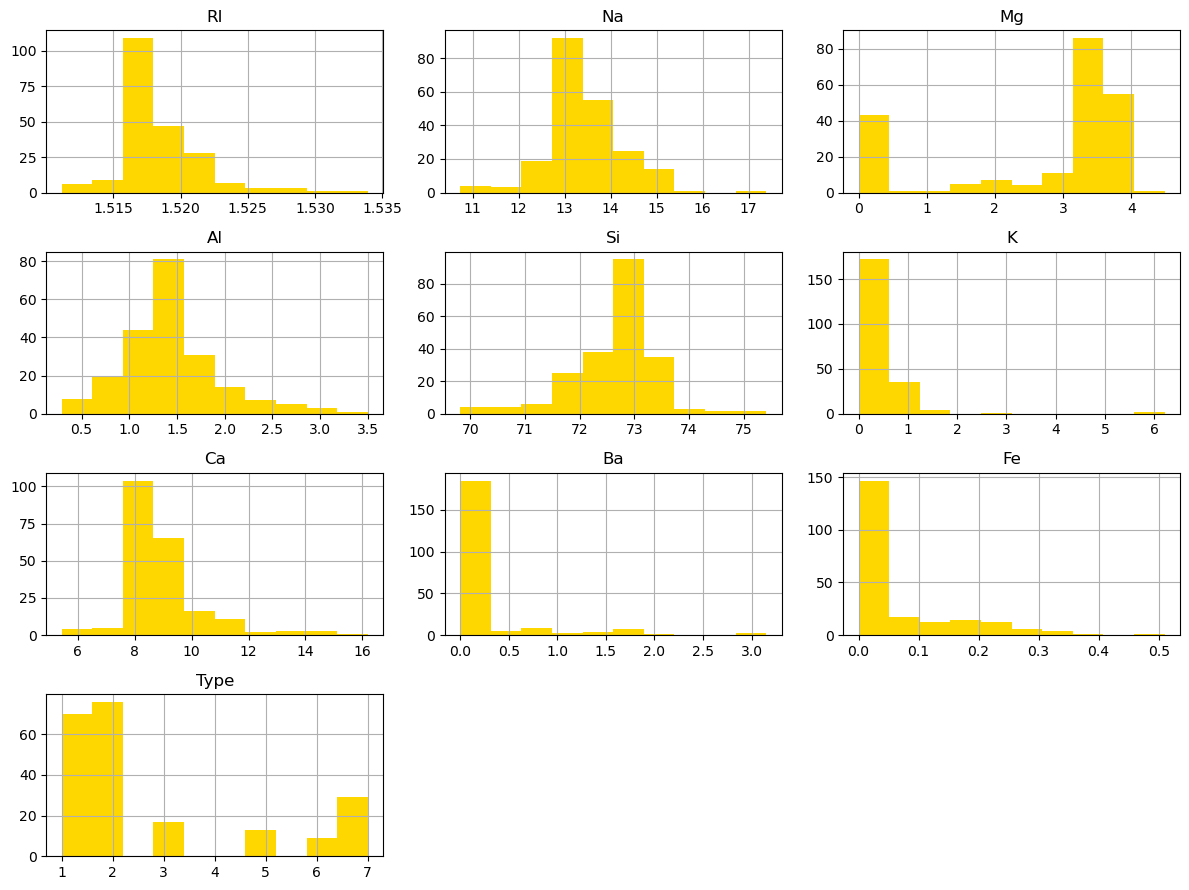

In [61]:
# plotting histplot
df.hist(figsize=(12,9),color='gold')
plt.tight_layout()
plt.show()

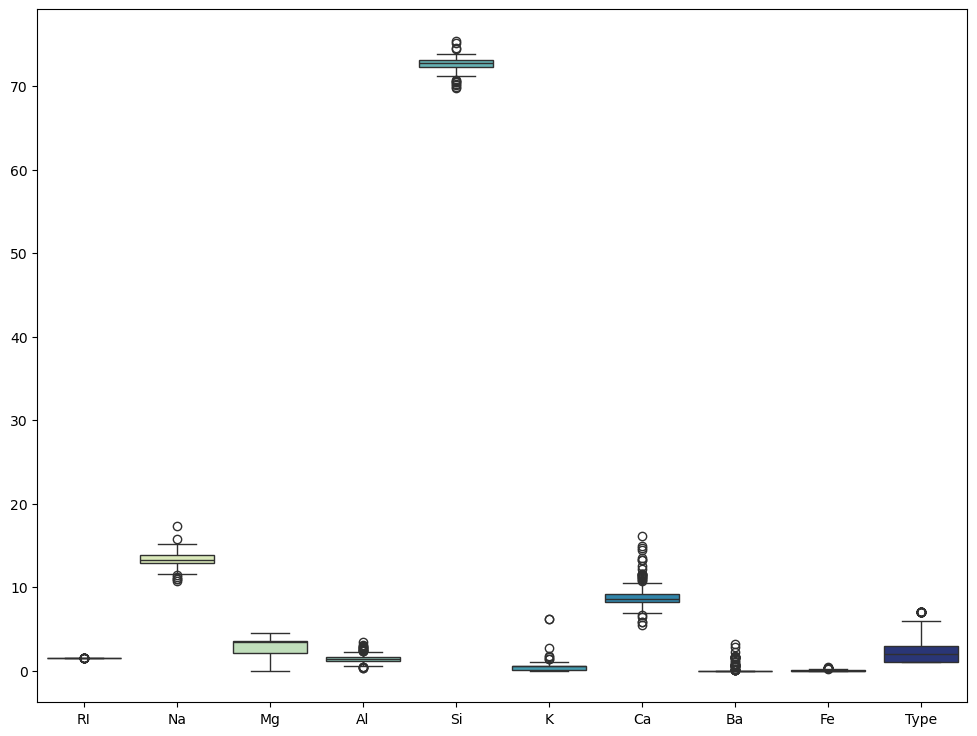

In [41]:
# plotting box plot to check for outliers
plt.figure(figsize=(12,9))
sns.boxplot(df,palette='YlGnBu')
plt.show()

In [79]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [89]:
# Feature selection
x=df.drop('Type',axis=1)
y=df['Type']

In [105]:
# Feature scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [107]:
# splitting the data into train and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [125]:
# fitting the model
from sklearn.ensemble import RandomForestClassifier
clf_rf= RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)
clf_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [111]:
clf_rf.oob_score_

0.7076023391812866

In [113]:
y_pred=clf_rf.predict(x_test)

In [115]:
# evaluating the model using different metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy:  0.7674418604651163
Confusion Matrix:
 [[11  0  0  0  0  0]
 [ 5  8  0  0  0  1]
 [ 1  1  1  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]
Classification Report:
               precision    recall  f1-score   support

           1       0.65      1.00      0.79        11
           2       0.73      0.57      0.64        14
           3       1.00      0.33      0.50         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.77        43
   macro avg       0.88      0.73      0.76        43
weighted avg       0.80      0.77      0.75        43



In [117]:
from sklearn.ensemble import GradientBoostingClassifier

model=GradientBoostingClassifier()
model.fit(x_train,y_train)


GradientBoostingClassifier()

In [118]:
y_pred=model.predict(x_test)

In [119]:
# Evaluate the model

print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy:  0.8604651162790697
Confusion Matrix:
 [[11  0  0  0  0  0]
 [ 3 11  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  1  0  1  1]
 [ 0  0  0  0  0  8]]
Classification Report:
               precision    recall  f1-score   support

           1       0.79      1.00      0.88        11
           2       0.92      0.79      0.85        14
           3       0.75      1.00      0.86         3
           5       1.00      0.75      0.86         4
           6       1.00      0.33      0.50         3
           7       0.89      1.00      0.94         8

    accuracy                           0.86        43
   macro avg       0.89      0.81      0.81        43
weighted avg       0.88      0.86      0.85        43



**Explanation of Bagging vs. Boosting:** 

* Bagging: Builds multiple models in parallel. Each model is trained on a random subset of the data. The final prediction is an average or majority vote of these models. It reduces variance and avoids overfitting.
* Boosting: Trains models sequentially. Each subsequent model focuses on the mistakes of the previous model, improving prediction accuracy over time. Boosting is more prone to overfitting but often achieves higher accuracy.

**Handling imbalanced datasets can be done in several ways:**

1. Resampling the dataset: You can either oversample the minority class or undersample the majority class.
2. Use algorithms that handle imbalance: Random Forest and Gradient Boosting can handle imbalanced data by setting class weights.
3. Use metrics like Precision, Recall, F1-score: Focus on these metrics rather than just accuracy when dealing with imbalanced data.

In [127]:
# we can see that accuracy for random forest is 76% whereas after using boosting the accuracy has increased to 86%

In [129]:
# random forest is a bagging algorithm and gradient boosting is boosting algorithm